<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

При увеличении $\alpha$ с  0 до 1 наше предсказание меняется с константы $с_0$ до сдвинутого исходного ряда.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

1) Небольшим, так как хотим побыстрее отобразить новые изменения

2) Побольше, чтоб не подстроиться под шум

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,


$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) {=} l_{t-1} + b_{t-1} + \alpha(y_t - (s_{t-p} + l_{t-1} + b_{t-1})) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} {=} b_{t-1} + \beta(l_{t} - (l_{t-1} + b_{t-1}))  \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} {=} s_{t-p} + \gamma(y_t - (l_t + s_{t-p})) \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,


**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

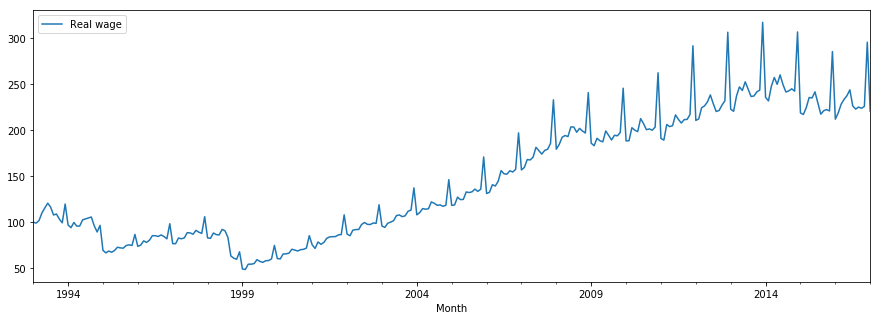

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE  

%matplotlib inline


wage = pd.read_csv('monthly-wage.csv', ';', decimal='.', index_col='Month',parse_dates=True, dayfirst=True)

# Put your code below
wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [2]:
ALPHA = np.linspace(0,1,100)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, wage=wage, step='M', AlgName='InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

In [3]:
# compare ES parameters
QualityStr = pd.DataFrame(index=wage.columns, columns=FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.4141414141414142, 'AdaptationPeriod': 10}      0.058955
IES {'alpha': 0.40404040404040409, 'AdaptationPeriod': 10}     0.058957
IES {'alpha': 0.42424242424242425, 'AdaptationPeriod': 10}     0.058959
IES {'alpha': 0.39393939393939398, 'AdaptationPeriod': 10}     0.058966
IES {'alpha': 0.43434343434343436, 'AdaptationPeriod': 10}     0.058974
IES {'alpha': 0.38383838383838387, 'AdaptationPeriod': 10}     0.058988
IES {'alpha': 0.37373737373737376, 'AdaptationPeriod': 10}     0.059025
IES {'alpha': 0.44444444444444448, 'AdaptationPeriod': 10}     0.059040
IES {'alpha': 0.36363636363636365, 'AdaptationPeriod': 10}     0.059095
IES {'alpha': 0.45454545454545459, 'AdaptationPeriod': 10}     0.059137
IES {'alpha': 0.35353535353535359, 'AdaptationPeriod': 10}     0.059215
IES {'alpha': 0.4646464646464647, 'AdaptationPeriod': 10}      0.059244
IES {'alpha': 0.47474747474747481, 'AdaptationPeriod': 10}     0.059359
IES {'alpha': 0.34343434343434348, 'AdaptationPeriod': 10}     0

## 2) draw the forecast with optimial value $\alpha $

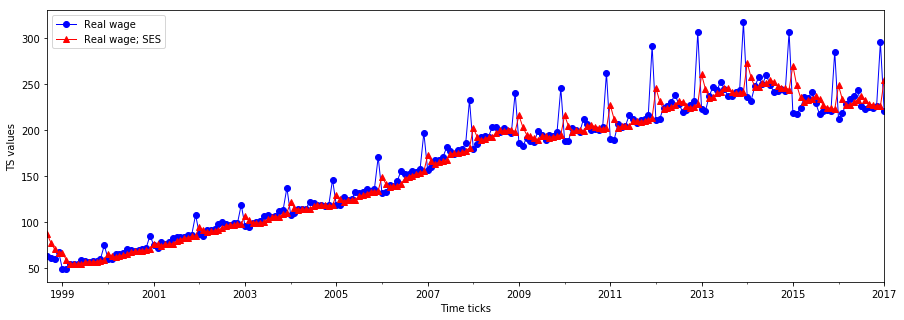

In [4]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01'],
               alg_title='SES')

** Question**
    * Does SES follow to the TS components?
** Answer**
    * It doesn't, because model can't keep up with the pace of TS growth + TS has a clear upward linear trend and sort of seasonality.

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [5]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.062955
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [6]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T + h)
    
    l = np.nan
    s = np.array([np.nan for i in range(p)])
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = 0
 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = 0
 
            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * l
            s[cntr % p] = delta * (x[cntr] - l) + (1 - delta) * s[cntr % p] 
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

In [7]:
ALPHA = np.linspace(0,1,100)
WESParamsArray = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':12} for (alpha, gamma) in zip(ALPHA, ALPHA)]
FRC_WAGE_W = BuildForecast(h=1, wage=wage, step='M', AlgName='WintersExponentialSmoothing', AlgTitle='WES',ParamsArray = WESParamsArray)

In [8]:
QualityStr = pd.DataFrame(index=wage.columns, columns=FRC_WAGE_W.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_W[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

WES {'alpha': 0.58585858585858586, 'seasonality_period': 12, 'gamma': 0.58585858585858586}      0.023745
WES {'alpha': 0.5757575757575758, 'seasonality_period': 12, 'gamma': 0.5757575757575758}        0.023749
WES {'alpha': 0.59595959595959602, 'seasonality_period': 12, 'gamma': 0.59595959595959602}      0.023751
WES {'alpha': 0.60606060606060608, 'seasonality_period': 12, 'gamma': 0.60606060606060608}      0.023777
WES {'alpha': 0.56565656565656575, 'seasonality_period': 12, 'gamma': 0.56565656565656575}      0.023778
WES {'alpha': 0.61616161616161624, 'seasonality_period': 12, 'gamma': 0.61616161616161624}      0.023829
WES {'alpha': 0.55555555555555558, 'seasonality_period': 12, 'gamma': 0.55555555555555558}      0.023839
WES {'alpha': 0.6262626262626263, 'seasonality_period': 12, 'gamma': 0.6262626262626263}        0.023897
WES {'alpha': 0.54545454545454553, 'seasonality_period': 12, 'gamma': 0.54545454545454553}      0.023924
WES {'alpha': 0.63636363636363646, 'seasonality_period'

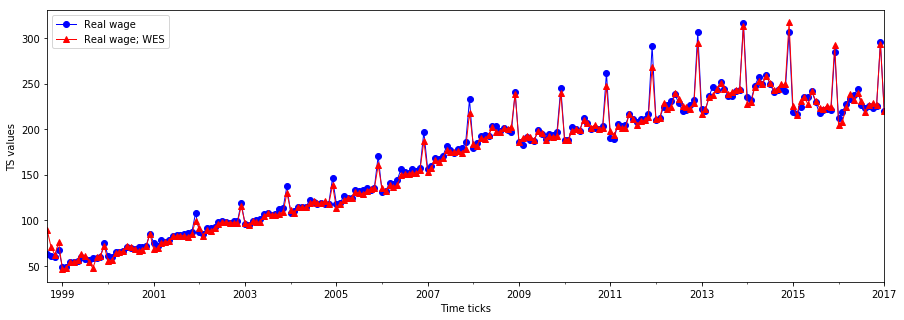

In [9]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_W[algName].loc['1998-09-01':'2017-01-01'],
               alg_title='WES')

In [10]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_W[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.017136
dtype: float64

Model has become better, it can describe time series

## Model has become much better due to accounting for seasonality! _But_ it still doesn't take trend into consideration.



# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [11]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    s = [np.NaN] * T
    b = (np.sum(x[p:2*p]) - np.sum(x[:p])) / p ** 2
    
    N = int(T / p)
    A = np.zeros(N)
    for j in range(N):
        A[j] = np.sum([x[p*j + i] for i in range(p)])
    A /= p    
    
    for t in range(p):
        s[t] = (np.array(x[t:p*N:p]) / A).sum() / N
    
    l = x[p]
    for t in range(p, T):
        if not math.isnan(x[t]):           
            l_prev = l 
            l = alpha * (x[t] - s[t-p]) + (1 - alpha) * (l + b)
            b = beta * (l - l_prev) + (1 - beta) * b
            s[t] = gamma * (x[t] - l) + (1 - gamma) * s[t-p]
            
        FORECAST[t + h] = l + h * b + s[t - p + h%p]
    return FORECAST

In [12]:
ALPHA = np.linspace(0,1,100)
TWESParamsArray = [{'alpha':alpha, 'gamma':gamma, 'beta':beta, 'seasonality_period':12}
                  for (alpha, gamma, beta) in zip(ALPHA, ALPHA, ALPHA)]
FRC_WAGE_TW = BuildForecast(h=1, wage=wage, step='M', AlgName='TheilWageExponentialSmoothing', AlgTitle='TWES',ParamsArray = TWESParamsArray)

In [13]:
QualityStr = pd.DataFrame(index=wage.columns, columns=FRC_WAGE_TW.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_TW[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

TWES {'alpha': 0.34343434343434348, 'beta': 0.34343434343434348, 'seasonality_period': 12, 'gamma': 0.34343434343434348}       0.032354
TWES {'alpha': 0.35353535353535359, 'beta': 0.35353535353535359, 'seasonality_period': 12, 'gamma': 0.35353535353535359}       0.032411
TWES {'alpha': 0.33333333333333337, 'beta': 0.33333333333333337, 'seasonality_period': 12, 'gamma': 0.33333333333333337}       0.032509
TWES {'alpha': 0.36363636363636365, 'beta': 0.36363636363636365, 'seasonality_period': 12, 'gamma': 0.36363636363636365}       0.032608
TWES {'alpha': 0.32323232323232326, 'beta': 0.32323232323232326, 'seasonality_period': 12, 'gamma': 0.32323232323232326}       0.032891
TWES {'alpha': 0.37373737373737376, 'beta': 0.37373737373737376, 'seasonality_period': 12, 'gamma': 0.37373737373737376}       0.033022
TWES {'alpha': 0.31313131313131315, 'beta': 0.31313131313131315, 'seasonality_period': 12, 'gamma': 0.31313131313131315}       0.033378
TWES {'alpha': 0.38383838383838387, 'beta': 0.38

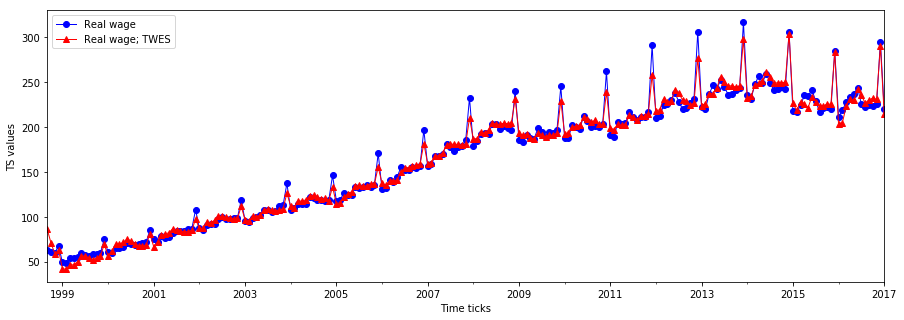

In [14]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_TW[algName].loc['1998-09-01':'2017-01-01'],
               alg_title='TWES')

In [15]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_TW[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.025144
dtype: float64

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [16]:
ALPHA = np.linspace(0,1,100)
MWESParamsArray = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':12}
                  for (alpha, gamma) in zip(ALPHA, ALPHA)]
FRC_WAGE_MW = BuildForecast(h=1, wage=wage, step='M', AlgName='MultiWintersExponentialSmoothing',
                            AlgTitle='MWES',ParamsArray = MWESParamsArray)

In [17]:
QualityStr = pd.DataFrame(index=wage.columns, columns=FRC_WAGE_MW.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_MW[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

MWES {'alpha': 0.6262626262626263, 'seasonality_period': 12, 'gamma': 0.6262626262626263}        0.022550
MWES {'alpha': 0.63636363636363646, 'seasonality_period': 12, 'gamma': 0.63636363636363646}      0.022559
MWES {'alpha': 0.61616161616161624, 'seasonality_period': 12, 'gamma': 0.61616161616161624}      0.022571
MWES {'alpha': 0.64646464646464652, 'seasonality_period': 12, 'gamma': 0.64646464646464652}      0.022580
MWES {'alpha': 0.60606060606060608, 'seasonality_period': 12, 'gamma': 0.60606060606060608}      0.022604
MWES {'alpha': 0.65656565656565657, 'seasonality_period': 12, 'gamma': 0.65656565656565657}      0.022607
MWES {'alpha': 0.66666666666666674, 'seasonality_period': 12, 'gamma': 0.66666666666666674}      0.022641
MWES {'alpha': 0.59595959595959602, 'seasonality_period': 12, 'gamma': 0.59595959595959602}      0.022644
MWES {'alpha': 0.6767676767676768, 'seasonality_period': 12, 'gamma': 0.6767676767676768}        0.022687
MWES {'alpha': 0.58585858585858586, 'seasonali

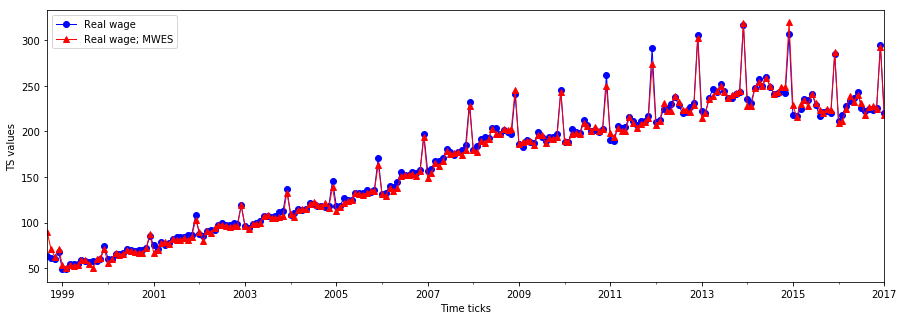

In [18]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_MW[algName].loc['1998-09-01':'2017-01-01'],
               alg_title='MWES')

In [19]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_MW[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.014084
dtype: float64

Seasonality has multiplicative structure, so it's a little better, than Winter's model